In [1]:
'''
Notebook for analyzing evaluation results and generating figures
Note, code is messy currently! 
Evaluation code primarily written to make it easy for me to write into tables by hand. 
'''

import imageio
import numpy as np
import os

from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import pandas as pd
import numpy as np

import cv2

In [4]:
main_results_dir = '/om/user/katiemc/occupancy_networks/out/unconditional'
num_training_objs = [1,2,100,1000,4000]
obj_types = ['chairs'] 
reconstruction_eval_splits = ['train', 'test']

In [5]:
metric = 'mean'
split = 'train'
for obj_type in obj_types:
    for num_objs in num_training_objs:
            result_dir = f'{main_results_dir}/{obj_type}{num_objs}/generation/{split}/'
            print(f'\nCurrently looking at {num_objs}, {split}')
            df = pd.read_pickle(result_dir + 'eval_input_full.pkl')
            df_descr = df.describe()
            stats = ['iou (mesh)', 'chamfer-L1 (mesh)', 'normals (mesh)']
            for stat in stats: print(f'Stat: {stat}, {df_descr[stat][metric]}')


Currently looking at 1, train
Stat: iou (mesh), 0.7561857104301453
Stat: chamfer-L1 (mesh), 0.007469882257282734
Stat: normals (mesh), 0.8914806071247379

Currently looking at 2, train
Stat: iou (mesh), 0.48183680325746536
Stat: chamfer-L1 (mesh), 0.0393240530975163
Stat: normals (mesh), 0.7331621148525583

Currently looking at 100, train
Stat: iou (mesh), 0.1193414361588657
Stat: chamfer-L1 (mesh), 0.08647184675992137
Stat: normals (mesh), 0.6224677938848618

Currently looking at 1000, train
Stat: iou (mesh), 0.11395175536620081
Stat: chamfer-L1 (mesh), 0.08768203408570141
Stat: normals (mesh), 0.6594396265790299

Currently looking at 4000, train
Stat: iou (mesh), 0.11449543321443525
Stat: chamfer-L1 (mesh), 0.08772464363789186
Stat: normals (mesh), 0.6591979270014551


In [5]:
metric = 'max'
split = 'train'
for obj_type in obj_types:
    for num_objs in num_training_objs:
            result_dir = f'{main_results_dir}/{obj_type}{num_objs}/generation/{split}/'
            print(f'\nCurrently looking at {num_objs}, {split}')
            df = pd.read_pickle(result_dir + 'eval_input_full.pkl')
            df_descr = df.describe()
            stats = ['iou (mesh)', 'chamfer-L1 (mesh)', 'normals (mesh)']
            for stat in stats: 
                if stat == 'chamfer-L1 (mesh)' and metric == 'max':
                    val = df_descr[stat]['min']
                    print(f'Stat: {stat}, {val}')
                else: print(f'Stat: {stat}, {df_descr[stat][metric]}')


Currently looking at 1, train
Stat: iou (mesh), 0.7561857104301453
Stat: chamfer-L1 (mesh), 0.007469882257282734
Stat: normals (mesh), 0.8914806071247379

Currently looking at 2, train
Stat: iou (mesh), 0.9293515086174011
Stat: chamfer-L1 (mesh), 0.005226508714258671
Stat: normals (mesh), 0.8954116006393751

Currently looking at 100, train
Stat: iou (mesh), 0.5593036413192749
Stat: chamfer-L1 (mesh), 0.034817811101675034
Stat: normals (mesh), 0.7961704003013116

Currently looking at 1000, train
Stat: iou (mesh), 0.6221321821212769
Stat: chamfer-L1 (mesh), 0.0175645649433136
Stat: normals (mesh), 0.8541360750857042

Currently looking at 4000, train
Stat: iou (mesh), 0.6633982062339783
Stat: chamfer-L1 (mesh), 0.012198813259601593
Stat: normals (mesh), 0.8735443937531929


In [6]:
metric = 'mean'
split = 'test'
for obj_type in obj_types:
    for num_objs in num_training_objs:
            result_dir = f'{main_results_dir}/{obj_type}{num_objs}/generation/{split}/'
            print(f'\nCurrently looking at {num_objs}, {split}')
            df = pd.read_pickle(result_dir + 'eval_input_full.pkl')
            df_descr = df.describe()
            stats = ['iou (mesh)', 'chamfer-L1 (mesh)', 'normals (mesh)']
            for stat in stats: 
                if stat == 'chamfer-L1 (mesh)' and metric == 'max':val = df_descr[stat]['min'] 
                else: val = df_descr[stat][metric]
                print(f'Stat: {stat}, {val.round(3)}')


Currently looking at 1, test
Stat: iou (mesh), 0.073
Stat: chamfer-L1 (mesh), 0.08
Stat: normals (mesh), 0.599

Currently looking at 2, test
Stat: iou (mesh), 0.064
Stat: chamfer-L1 (mesh), 0.086
Stat: normals (mesh), 0.604

Currently looking at 100, test
Stat: iou (mesh), 0.12
Stat: chamfer-L1 (mesh), 0.083
Stat: normals (mesh), 0.652

Currently looking at 1000, test
Stat: iou (mesh), 0.117
Stat: chamfer-L1 (mesh), 0.086
Stat: normals (mesh), 0.661

Currently looking at 4000, test
Stat: iou (mesh), 0.115
Stat: chamfer-L1 (mesh), 0.088
Stat: normals (mesh), 0.658


In [7]:
metric = 'max'
split = 'test'
for obj_type in obj_types:
    for num_objs in num_training_objs:
            result_dir = f'{main_results_dir}/{obj_type}{num_objs}/generation/{split}/'
            print(f'\nCurrently looking at {num_objs}, {split}')
            df = pd.read_pickle(result_dir + 'eval_input_full.pkl')
            df_descr = df.describe()
            stats = ['iou (mesh)', 'chamfer-L1 (mesh)', 'normals (mesh)']
            for stat in stats: 
                if stat == 'chamfer-L1 (mesh)' and metric == 'max':val = df_descr[stat]['min'] 
                else: val = df_descr[stat][metric]
                print(f'Stat: {stat}, {val.round(3)}')


Currently looking at 1, test
Stat: iou (mesh), 0.248
Stat: chamfer-L1 (mesh), 0.034
Stat: normals (mesh), 0.745

Currently looking at 2, test
Stat: iou (mesh), 0.296
Stat: chamfer-L1 (mesh), 0.038
Stat: normals (mesh), 0.752

Currently looking at 100, test
Stat: iou (mesh), 0.696
Stat: chamfer-L1 (mesh), 0.02
Stat: normals (mesh), 0.861

Currently looking at 1000, test
Stat: iou (mesh), 0.715
Stat: chamfer-L1 (mesh), 0.018
Stat: normals (mesh), 0.868

Currently looking at 4000, test
Stat: iou (mesh), 0.598
Stat: chamfer-L1 (mesh), 0.019
Stat: normals (mesh), 0.86


In [16]:
num_objs = 2
result_dir = f'{main_results_dir}/chairs{num_objs}/generation/train/'
df = pd.read_pickle(result_dir+ 'eval_input_full.pkl')

In [17]:
obj_names = list(df['modelname'][:2])
obj_names

['78f5b44157269f99fd60059ad8523f1a']

In [4]:
def plot_gt(obj_name, ax,
            view_file = '023.jpg', shapenet_dir='/om/user/katiemc/occupancy_networks/data/ShapeNet/03001627/'):
    
    img = cv2.imread(f'{shapenet_dir}{obj_name}/img_choy2016/{view_file}')
    ax.imshow(img)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_frame_on(False)
    ax.tick_params(top=False, left=False, bottom=False, right=False)

def plot_rendering(mesh_dir, obj_name, ax,
                  view_idx=0):
    # help rotating image: https://stackoverflow.com/questions/31401812/matplotlib-rotate-image-file-by-x-degrees
    img = Image.open(f'{mesh_dir}{obj_name}_{view_idx}.png')
    if view_idx == 0: img = img.rotate(90) # Rotates counter clock-wise.
    ax.imshow(img)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_frame_on(False)
    ax.tick_params(top=False, left=False, bottom=False, right=False)
    
def plot_uncond_sample(img_path, ax,rotate=True):
    # help rotating image: https://stackoverflow.com/questions/31401812/matplotlib-rotate-image-file-by-x-degrees
    img = Image.open(img_path)
    if rotate: img = img.rotate(90) # Rotates counter clock-wise.
    ax.imshow(img)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_frame_on(False)
    ax.tick_params(top=False, left=False, bottom=False, right=False)

In [84]:
# gridspec help: https://matplotlib.org/stable/tutorials/intermediate/gridspec.html

view_idxs = [0,1]
split= 'train'

rows = len(view_idxs)
cols = len(num_training_objs) + 1 

f = plt.figure(figsize=(6, 2), dpi=600)
gs0 = gridspec.GridSpec(1, cols, figure=f)

for y in range(cols):
    if y == 0: # ground truth
        ax = f.add_subplot(gs0[0, y])
        plot_gt(obj_names[0], ax)
    else: 
        # create another grid spec for objs
        gs00 = gridspec.GridSpecFromSubplotSpec(rows, 1, subplot_spec=gs0[0, y],
                                               wspace=0.025, hspace=-0.3)
        for internal_row, view_idx in enumerate(view_idxs): 
            ax = f.add_subplot(gs00[internal_row, 0])
            num_objs = num_training_objs[y-1]
            mesh_dir = f'{main_results_dir}/{obj_type}{num_objs}/generation/{split}/meshes/03001627/'
            plot_rendering(mesh_dir, obj_names[0], ax, view_idx= view_idx)
            if internal_row==0: ax.set_title(f'{num_objs}')
            ax.axis('off')
plt.axis('off')
plt.close(f)
f.tight_layout()
f.savefig('./rocking_chair.png', bbox='tight', bbox_inches='tight', pad_inches=0.)

y:  1
y:  1
y:  2
y:  2
y:  3
y:  3
y:  4
y:  4
y:  5
y:  5


In [86]:
view_idxs = [0,1]
split= 'train'

show_training_objs = [2,4000]

rows = len(view_idxs)
cols = len(show_training_objs) + 1 
    
obj_name = obj_names[1]

f = plt.figure(figsize=(5, 2), dpi=600)
gs0 = gridspec.GridSpec(1, cols, figure=f)

for y in range(cols):
    if y == 0: # ground truth
        ax = f.add_subplot(gs0[0, y])
        plot_gt(obj_name, ax)
    else: 
        # create another grid spec for objs
        gs00 = gridspec.GridSpecFromSubplotSpec(rows, 1, subplot_spec=gs0[0, y],
                                               wspace=0.025, hspace=-0.3)
        for internal_row, view_idx in enumerate(view_idxs): 
            ax = f.add_subplot(gs00[internal_row, 0])
            num_objs = show_training_objs[y-1]
            mesh_dir = f'{main_results_dir}/{obj_type}{num_objs}/generation/{split}/meshes/03001627/'
            plot_rendering(mesh_dir, obj_name, ax, view_idx= view_idx)
            if internal_row==0: ax.set_title(f'{num_objs}')
            ax.axis('off')
plt.axis('off')
plt.close(f)
f.tight_layout()
f.savefig('./overfit_2obj.png', bbox='tight', bbox_inches='tight', pad_inches=0.)

In [18]:
obj_type = 'chairs'
result_dir = f'{main_results_dir}/{obj_type}{num_objs}/generation/test/'
df = pd.read_pickle(result_dir+ 'eval_input_full.pkl')
obj_names = list(df['modelname'])

In [21]:
# test reconstructions - each row is a diff sample
view_idx = 0 # use consistent view 
split= 'test'

objs = [1,2,3,5] # no particular reason for selection (random sort), but avoid color distortion gt for plotting 

rows = len(objs)
cols = len(num_training_objs) + 1 

f = plt.figure(figsize=(6, 2), dpi=600)
gs0 = gridspec.GridSpec(1, cols, figure=f)

for y in range(cols):
    gs00 = gridspec.GridSpecFromSubplotSpec(rows, 1, subplot_spec=gs0[0, y],
                                               wspace=0.025, hspace=-0.3)
    for internal_row in range(rows): 
        obj_name = obj_names[objs[internal_row]]
        if y == 0: # ground truth
            ax = f.add_subplot(gs00[internal_row, 0])
            plot_gt(obj_name, ax)
        else: 
            ax = f.add_subplot(gs00[internal_row, 0])
            num_objs = num_training_objs[y-1]
            mesh_dir = f'{main_results_dir}/{obj_type}{num_objs}/generation/{split}/meshes/03001627/'
            plot_rendering(mesh_dir, obj_name, ax, view_idx= view_idx)
            if internal_row==0: ax.set_title(f'{num_objs}')
            ax.axis('off')
plt.axis('off')
plt.close(f)
f.tight_layout()
f.savefig('./test_reconstructions.png', bbox='tight', bbox_inches='tight', pad_inches=0.)

In [30]:
# test reconstructions - each row is a diff sample
view_idxs = [0,1] # use consistent view 
split= 'test'

objs = [1,2,5,7] # no particular reason for selection (random sort), but avoid color distortion gt for plotting 

rows = len(objs)
cols = len(num_training_objs) + 1 

f = plt.figure(figsize=(6, 2), dpi=600)
gs0 = gridspec.GridSpec(1, cols, figure=f)

for y in range(cols):
    if y == 0: 
        gs00 = gridspec.GridSpecFromSubplotSpec(rows, 1, subplot_spec=gs0[0, y],
                                                   wspace=0.025, hspace=-0.3)
        for internal_row in range(rows): 
            obj_name = obj_names[objs[internal_row]]
            ax = f.add_subplot(gs00[internal_row, 0])
            plot_gt(obj_name, ax)
    else: 
        gs00 = gridspec.GridSpecFromSubplotSpec(rows, len(view_idxs), subplot_spec=gs0[0, y],
                                                   wspace=0.025, hspace=-0.3)
        for internal_row in range(rows):
            obj_name = obj_names[objs[internal_row]]
            for internal_col, view_idx in enumerate(view_idxs):
                ax = f.add_subplot(gs00[internal_row, internal_col])
                num_objs = num_training_objs[y-1]
                mesh_dir = f'{main_results_dir}/{obj_type}{num_objs}/generation/{split}/meshes/03001627/'
                plot_rendering(mesh_dir, obj_name, ax, view_idx= view_idx)
                if internal_row==0 and internal_col==0: ax.set_title(f'{num_objs}')
                ax.axis('off')
plt.axis('off')
plt.close(f)
f.tight_layout()
f.savefig('./test_reconstructions.png', bbox='tight', bbox_inches='tight', pad_inches=0.)

In [43]:
# test reconstructions - each row is a diff sample
view_idx = 0# use consistent view 
rows = 5 # number of unconditional samples to show
cols = len(num_training_objs)

f = plt.figure(figsize=(5, 4), dpi=600)
gs0 = gridspec.GridSpec(rows, cols, figure=f)

for x in range(rows):
    for y in range(cols):
        ax = f.add_subplot(gs0[x, y])
        num_objs = num_training_objs[y]
        uncond_path = f'{main_results_dir}/{obj_type}{num_objs}/uncond_gen/uncond_sample_{x}_{view_idx}.png'
        print("uncond_path: ", uncond_path)
        plot_uncond_sample(uncond_path, ax, rotate=view_idx==0)
        if x ==0: ax.set_title(f'{num_objs}')
        ax.axis('off')
# plt.show()
plt.axis('off')
plt.close(f)
f.tight_layout()
f.savefig('./uncond_samples.png', bbox='tight', bbox_inches='tight', pad_inches=0.)

uncond_path:  /om/user/katiemc/occupancy_networks/out/unconditional/chairs1/uncond_gen/uncond_sample_0_0.png
uncond_path:  /om/user/katiemc/occupancy_networks/out/unconditional/chairs2/uncond_gen/uncond_sample_0_0.png
uncond_path:  /om/user/katiemc/occupancy_networks/out/unconditional/chairs100/uncond_gen/uncond_sample_0_0.png
uncond_path:  /om/user/katiemc/occupancy_networks/out/unconditional/chairs1000/uncond_gen/uncond_sample_0_0.png
uncond_path:  /om/user/katiemc/occupancy_networks/out/unconditional/chairs4000/uncond_gen/uncond_sample_0_0.png
uncond_path:  /om/user/katiemc/occupancy_networks/out/unconditional/chairs1/uncond_gen/uncond_sample_1_0.png
uncond_path:  /om/user/katiemc/occupancy_networks/out/unconditional/chairs2/uncond_gen/uncond_sample_1_0.png
uncond_path:  /om/user/katiemc/occupancy_networks/out/unconditional/chairs100/uncond_gen/uncond_sample_1_0.png
uncond_path:  /om/user/katiemc/occupancy_networks/out/unconditional/chairs1000/uncond_gen/uncond_sample_1_0.png
uncond

In [18]:
# re-run specific low-data cases
main_results_dir = '/om/user/katiemc/occupancy_networks/out/unconditional'
num_training_objs = [1,2,100]
obj_types = ['chairs'] 
metric = 'mean'
split = 'train'
for obj_type in obj_types:
    for num_objs in num_training_objs:
            result_dir = f'{main_results_dir}/{obj_type}{num_objs}_repeat/generation/{split}/'
            print(f'\nCurrently looking at {num_objs}, {split}')
            df = pd.read_pickle(result_dir + 'eval_input_full.pkl')
            df_descr = df.describe()
            stats = ['iou (mesh)', 'chamfer-L1 (mesh)', 'normals (mesh)']
            for stat in stats: print(f'Stat: {stat}, {df_descr[stat][metric]}')


Currently looking at 1, train
Stat: iou (mesh), 0.24841168522834778
Stat: chamfer-L1 (mesh), 0.03321806341409683
Stat: normals (mesh), 0.641760019448943

Currently looking at 2, train
Stat: iou (mesh), 0.48140802793204784
Stat: chamfer-L1 (mesh), 0.03463382879272103
Stat: normals (mesh), 0.7749867046885377

Currently looking at 100, train
Stat: iou (mesh), 0.11314231862779707
Stat: chamfer-L1 (mesh), 0.07924444941803813
Stat: normals (mesh), 0.6546527310292666


FileNotFoundError: [Errno 2] No such file or directory: '/om/user/katiemc/occupancy_networks/out/unconditional/chairs1_repeat/generation/train/meshes/03001627/78f5b44157269f99fd60059ad8523f1a_0.png'

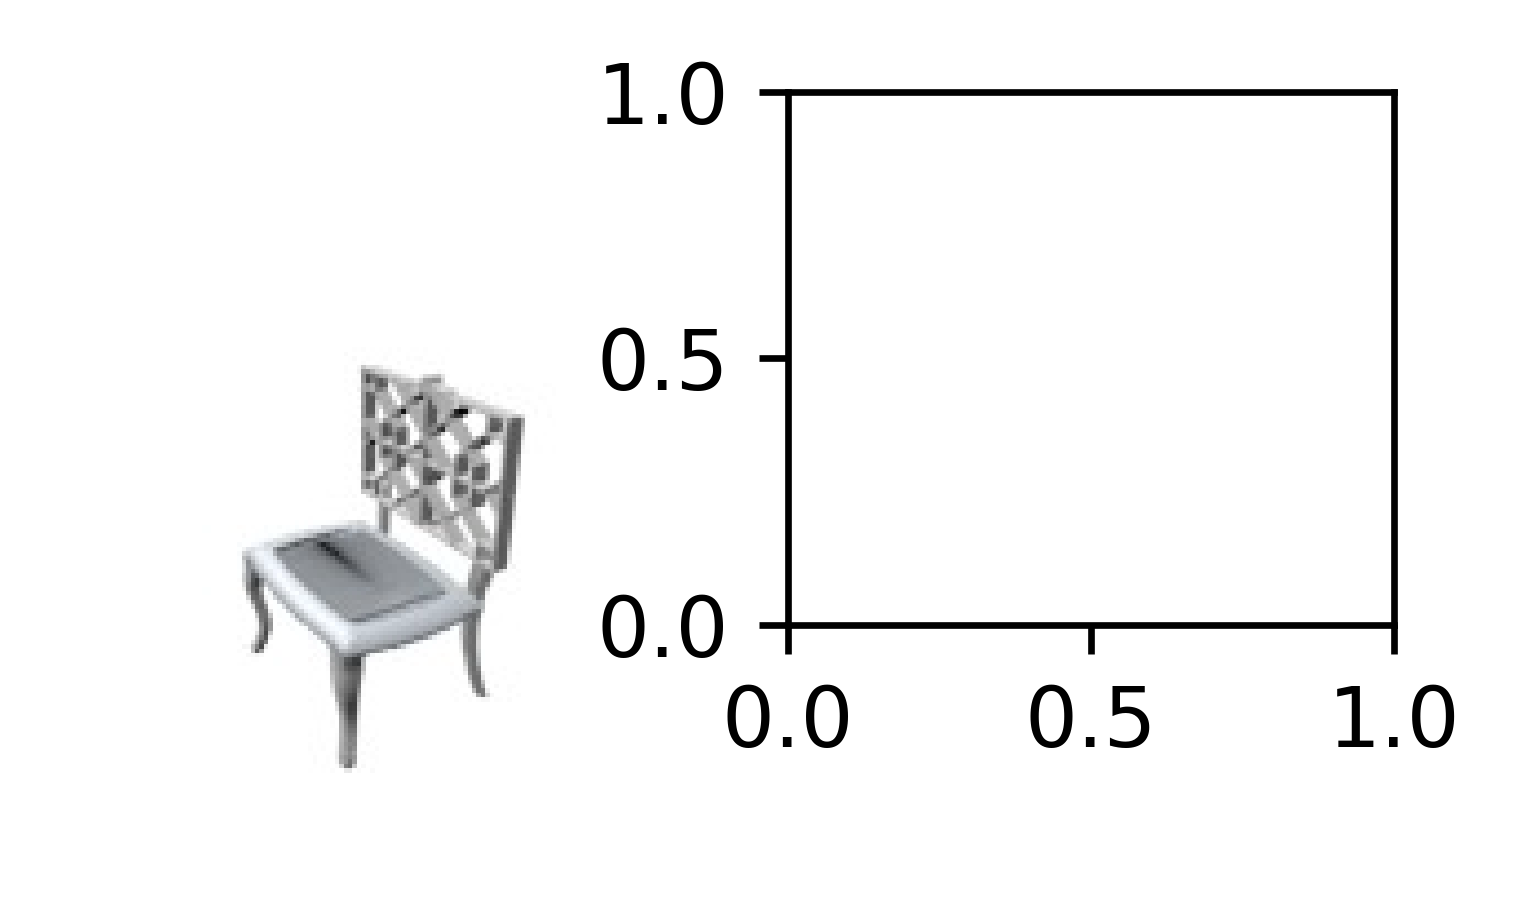

In [19]:
# gridspec help: https://matplotlib.org/stable/tutorials/intermediate/gridspec.html

view_idxs = [0,1]
split= 'train'

rows = len(view_idxs)
cols = len(num_training_objs) + 1 

f = plt.figure(figsize=(6, 2), dpi=600)
gs0 = gridspec.GridSpec(1, cols, figure=f)

for y in range(cols):
    if y == 0: # ground truth
        ax = f.add_subplot(gs0[0, y])
        plot_gt(obj_names[0], ax)
    else: 
        # create another grid spec for objs
        gs00 = gridspec.GridSpecFromSubplotSpec(rows, 1, subplot_spec=gs0[0, y],
                                               wspace=0.025, hspace=-0.3)
        for internal_row, view_idx in enumerate(view_idxs): 
            ax = f.add_subplot(gs00[internal_row, 0])
            num_objs = num_training_objs[y-1]
            mesh_dir = f'{main_results_dir}/{obj_type}{num_objs}_repeat/generation/{split}/meshes/03001627/'
            plot_rendering(mesh_dir, obj_names[0], ax, view_idx= view_idx)
            if internal_row==0: ax.set_title(f'{num_objs}')
            ax.axis('off')
plt.axis('off')
plt.close(f)
f.tight_layout()
f.savefig('./rerunSingle.png', bbox='tight', bbox_inches='tight', pad_inches=0.)